# Pyber Matplotlib Project

In [46]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
citydata_df = pd.read_csv(city_data_to_load)
ridedata_df = pd.read_csv(ride_data_to_load)

citydata_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [47]:
# Combine the data into a single dataset
merged_df = pd.merge(citydata_df, ridedata_df, how='inner', on='city')

# Display the data table for preview
merged_df.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [48]:
merged_df.tail()

,city,driver_count,type,date,fare,ride_id
2370,Jessicaport,1,Rural,2018-01-31 17:57:25,58.29,623154556195
2371,South Saramouth,7,Rural,2018-02-20 16:32:36,44.29,3622365199969
2372,South Saramouth,7,Rural,2018-01-28 15:55:33,31.25,7118046558393
2373,South Saramouth,7,Rural,2018-03-27 21:07:16,11.87,170351888128
2374,South Saramouth,7,Rural,2018-04-12 18:11:50,57.23,5081198789583


## Bubble Plot of Ride Sharing Data

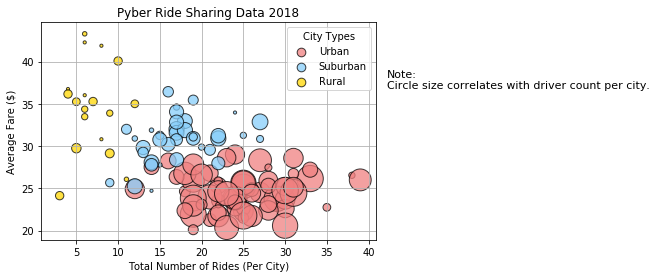

In [51]:
# Obtain the x and y coordinates for each of the three city types
by_city = merged_df.groupby('city')

avg_fare = by_city.mean()['fare']

ride_count = by_city['ride_id'].count()

driver_count = by_city.mean()['driver_count']

city_type = citydata_df.set_index('city')['type']

city_info = pd.DataFrame({
    "Number of Rides": ride_count,
    "Average Fare": avg_fare,
    "Number of Drivers": driver_count,
    "Type of City": city_type
})

city_info.sort_values('Number of Drivers', ascending = False)

rural = city_info[city_info['Type of City'] == 'Rural']
suburban = city_info[city_info['Type of City'] == 'Suburban']
urban = city_info[city_info['Type of City'] == 'Urban']

color_codes = {'Pink':'#F08080','Blue':'#87CEFA','Yellow':'#FFD702'}

city_color = {'Urban': color_codes['Pink'], 'Suburban': color_codes['Blue'], 
              'Rural': color_codes['Yellow']}

plt.title('Pyber Ride Sharing Data 2018')

# Build the scatter plots for each city types

plt.scatter(urban['Number of Rides'], urban['Average Fare'], 
    s = urban['Number of Drivers']*10, color = city_color['Urban'], 
    edgecolor = 'black', label = 'Urban', alpha = .75)
plt.scatter(suburban['Number of Rides'], suburban['Average Fare'], 
    s = suburban['Number of Drivers']*10, color = city_color['Suburban'], 
    edgecolor = 'black', label = 'Suburban', alpha = .75)
plt.scatter(rural['Number of Rides'], rural['Average Fare'], 
    s = rural['Number of Drivers']*10, color = city_color['Rural'], 
    edgecolor = 'black', label = 'Rural', alpha = .75)

# Incorporate the other graph properties

# Create a legend
lgnd = plt.legend(title = "City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

plt.grid(True)

plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')

note = "Note:\nCircle size correlates with driver count per city."
# Incorporate a text label regarding circle size
plt.gcf().text(0.925, 0.65, note, fontsize=11)


# Save Figure
plt.savefig("pyberscatterplot.png", dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)

# Show plot
plt.show()

## Total Fares by City Type

In [ ]:
# Calculate Type Percents

# Build Pie Chart

# Save Figure


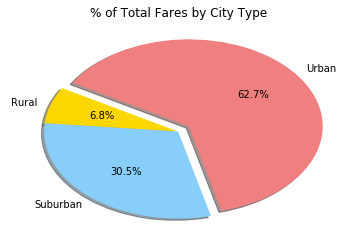

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

In [ ]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure


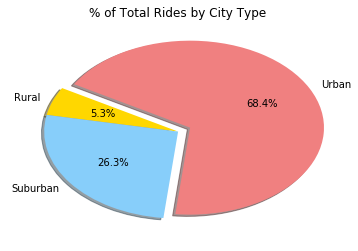

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [ ]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure


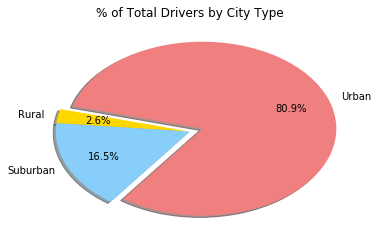

In [6]:
# Show Figure
plt.show()